# Linear Regression using Scikit-Learn

In Scikit-Learn (sklearn) we can implement & utilize Linear Regression in two ways:
-  implement linear regression using Gradient Descent Model  >> SGDRegressor()
- implement linear regression using a Normal Equation Model  >> LinearRegression()
  > also known as: close form solution based on the normal equation

## 1. Linear Regression using SGDRgressor

### i) Import Libraries

In [1]:
import numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

### ii) Load Dataset

In [2]:
dataset_path = "../dataset/houses.txt"
dataset = np.loadtxt(dataset_path, delimiter=",")
print(f"dataset.shape: {dataset.shape}")
x_train = dataset[:,:-1]
y_train = dataset[:, -1]
print(f"x_train.shape: {x_train.shape}, y_train.shape: {y_train.shape}")
x_features = ['size(sqft)','bedrooms','floors','age']

dataset.shape: (100, 5)
x_train.shape: (100, 4), y_train.shape: (100,)


### iii) Features Scaling

In [3]:
# Scale/normalize the training data
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)

x_train_ptp = np.ptp(x_train, axis=0)
x_norm_ptp = np.ptp(x_norm, axis=0)
print(f"Peek-to-pek range of x_train: {x_train_ptp}")
print(f"Peek-to-pek range of x_norm: {x_norm_ptp}")


Peek-to-pek range of x_train: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peek-to-pek range of x_norm: [5.84 6.13 2.06 3.68]


### iv) Linear Regression using SGDRegressor

In [4]:
# Create and fit the regression model
sgd = SGDRegressor(max_iter=1000)
sgd.fit(x_norm, y_train)

SGDRegressor()

In [5]:
print(f"# of iterations completed: {sgd.n_iter_}, # of weight updates: {sgd.t_}")
b_norm = sgd.intercept_
w_norm = sgd.coef_

# View parameters
print(f"b_norm: {b_norm} \n w_norm: {w_norm}")

# of iterations completed: 125, # of weight updates: 12501.0
b_norm: [362.23] 
 w_norm: [110.19 -21.25 -32.4  -37.87]


In [6]:
# Make predictions
# Predict the targets of the training data. Use both the predict routine and compute using  𝑤  and  𝑏 .

y_pred_sgd = sgd.predict(x_norm)

# Manual Prediction
y_pred = np.dot(x_norm, w_norm) + b_norm

print(f"Check Whether all Manual Predictions and Sklearn Predictions are Equal: {(y_pred_sgd == y_pred).all()}")
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

Check Whether all Manual Predictions and Sklearn Predictions are Equal: True
Prediction on training set:
[248.59 295.57 485.76 389.7 ]
Target values 
[271.5 300.  509.8 394. ]


### v) Plot Results

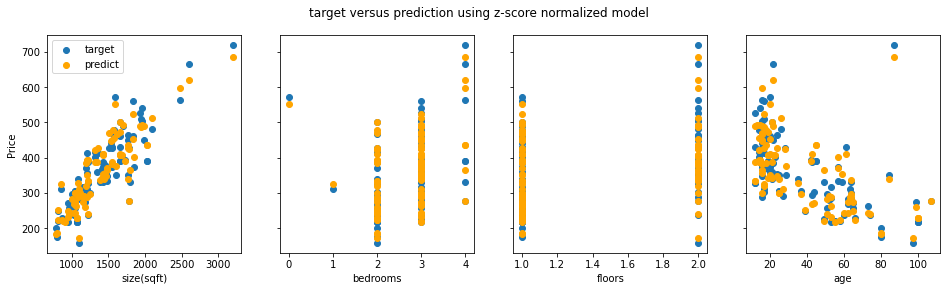

In [7]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(16,4),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_train[:,i],y_pred, color='orange', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

## 2. Linear Regression using Normal Equation

### i) Import Libraries

In [8]:
from sklearn.linear_model import LinearRegression

### ii) Load Dataset

In [9]:
dataset_path = "../dataset/houses.txt"
dataset = np.loadtxt(dataset_path, delimiter=",")
print(f"dataset.shape: {dataset.shape}")

x_train = dataset[:,:-1]
y_train = dataset[:, -1]
print(f"x_train.shape: {x_train.shape}, y_train.shape: {y_train.shape}")
x_features = ['size(sqft)','bedrooms','floors','age']

dataset.shape: (100, 5)
x_train.shape: (100, 4), y_train.shape: (100,)


### iii) Features Scaling

In [10]:
# Scale/normalize the training data
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)

x_train_ptp = np.ptp(x_train, axis=0)
x_norm_ptp = np.ptp(x_norm, axis=0)
print(f"Peek-to-pek range of x_train: {x_train_ptp}")
print(f"Peek-to-pek range of x_norm: {x_norm_ptp}")


Peek-to-pek range of x_train: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peek-to-pek range of x_norm: [5.84 6.13 2.06 3.68]


### iv) Linear Regression using Nomral Equation

In [11]:
lr = LinearRegression()
# lr.fit(x_train, y_train)
lr.fit(x_norm, y_train)

LinearRegression()

In [12]:
b_norm = lr.intercept_
w_norm = lr.coef_

# View parameters
print(f"b_norm: {b_norm} \n w_norm: {w_norm}")

b_norm: 362.23952 
 w_norm: [110.61 -21.47 -32.66 -37.78]


### v) Make Predictions

In [13]:
# Make predictions
# Predict the targets of the training data. Use both the predict routine and compute using  𝑤  and  𝑏 .

y_pred_lr = lr.predict(x_norm)

# Manual Prediction
y_pred = np.dot(x_norm, w_norm) + b_norm

print(f"Check Whether all Manual Predictions and Sklearn Predictions are Equal: {(y_pred_lr == y_pred).all()}")
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

Check Whether all Manual Predictions and Sklearn Predictions are Equal: True
Prediction on training set:
[248.66 295.58 485.82 389.61]
Target values 
[271.5 300.  509.8 394. ]


### vi) Plot Results

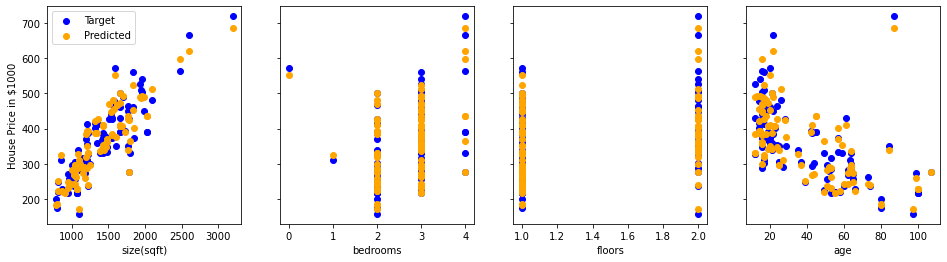

In [14]:
fig, ax = plt.subplots(1,4, figsize=(16,4), sharey=True)
for i in range(len(x_features)):
    ax[i].scatter(x_train[:,i], y_train, c="blue", label="Target")
    ax[i].scatter(x_train[:,i], y_pred, c="orange", label="Predicted")
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("House Price in $1000")
ax[0].legend()
plt.show()

### [Go to Home](../)